# Проектная работа: Исследование объявлений о продаже квартир

## Описание проекта

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

**Цель данной рыботы** - научиться определять рыночную стоимость объектов недвижимости. Поэтому наша **задача** — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**:
- `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м);
- `balcony` - число балконов;
- `ceiling_height` - высота потолков (м);
- `cityCenters_nearest` - расстояние до центра города (м);
- `days_exposition` - сколько дней было размещено объявление (от публикации до снятия);
- `first_day_exposition` - дата публикации;
- `floor` - этаж;
- `floors_total` - всего этажей в доме;
- `is_apartment` - апартаменты (булев тип);
- `kitchen_area` - площадь кухни в квадратных метрах (м²);
- `last_price` - цена на момент снятия с публикации;
- `living_area` - жилая площадь в квадратных метрах (м²);
- `locality_name` - название населённого пункта;
- `open_plan` - свободная планировка (булев тип);
- `parks_around3000` - число парков в радиусе 3 км;
- `parks_nearest` - расстояние до ближайшего парка (м);
- `ponds_around3000` - число водоёмов в радиусе 3 км;
- `ponds_nearest` - расстояние до ближайшего водоёма (м);
- `rooms` - число комнат;
- `studio` - квартира-студия (булев тип);
- `total_area` - площадь квартиры в квадратных метрах (м²);
- `total_images` - число фотографий квартиры в объявлении.

**План работы**:
1. Открытие датасета и изучение общей информации о данных;
2. Предобработка данных;
3. Дополнительные расчеты;
4. Исследовательский анализ данных;
5. Общие выводы.

### Шаг 1. Открытие таблицы и изучение общей информации о данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("real_estate_data.csv", sep = "\t")
pd.set_option("display.max_columns", 30)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.shape

(23699, 22)

Таблица с данными состоит из `23699` строк и `22` столбцов. Для отображения всех столбцов была установлена соответствующая настройка `display.max_columns`.

In [3]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Тип данных некоторых столбцов не соответствует описанию (например, тип данных в столбце `is_apartment` должен быть `bool` (булев тип), а не `object` (строковый тип)) или логическому представлению (например, столбец `floors_total` должен содержать тип данных `int64`, а не `float64`, потому что не может быть дробного количества этажей).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Примерно половина столбцов содержат незаполненные строки. Часть из них будут заполнены в соответствии с взаимосвязями, которые будут выявлены между разными столбцами. Другая часть столбцов будет оставлена пустой. 

### Выводы
<hr>

В целом качество представленных данных в таблице высокое, за исключением незначительных несоответствий типов данных логическому представлению о столбце и незаполненных строк, которые будут скорректированы по мере возможностей на этапе предобработки данных. Также будут проведены дополнительные проверки на наличие отрицательных или нулевых значений в столбцах, где они не вытекают из логики.

### Шаг 2. Предобработка данных

##### 2.1. Заполнение пропущенных значений 

Заполнять пропущенные значения в столбцах `living_area` и `kitchen_area` будем на основе зависимостей между ними и столбцами `total_area` и `rooms`. 

In [6]:
df[["total_area", "rooms", "ceiling_height", "living_area", "kitchen_area"]].corr().round(2)

,total_area,rooms,ceiling_height,living_area,kitchen_area
total_area,1.00,0.76,0.10,0.94,0.61
rooms,0.76,1.00,0.05,0.85,0.27
ceiling_height,0.10,0.05,1.00,0.09,0.09
living_area,0.94,0.85,0.09,1.00,0.43
kitchen_area,0.61,0.27,0.09,0.43,1.00


Корреляция между `living_area` и `total_area` является высокой. Поэтому `living_area` можно использовать в качестве категории для восстановаления пропусков в `total_area`.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

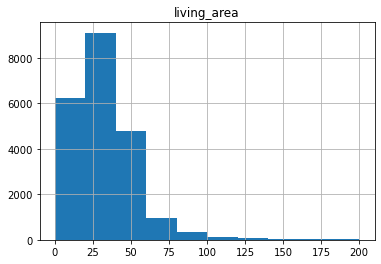

In [7]:
# посмотрим распределение living_area до заполнения пропущенных значений
df.hist("living_area", bins = 10, range = (0, 200))

Корреляция между жилой и общей площадями равняется 0.94


<AxesSubplot:xlabel='living_area', ylabel='total_area'>

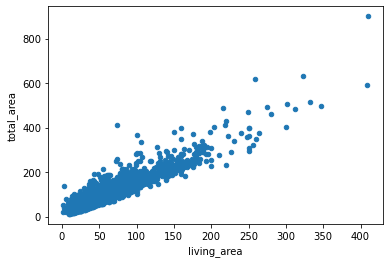

In [8]:
# диаграмма рассеяния подтверждает линейную зависимость между total_area и living_area
print("Корреляция между жилой и общей площадями равняется", 
      (df["living_area"].corr(df["total_area"])).round(2))
df.plot(x = "living_area", y = "total_area", kind = "scatter")

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

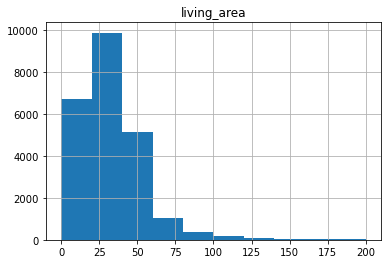

In [9]:
# применим группировку данных и заполним медианой пропуски
df["living_area"] = df.groupby("total_area")["living_area"].apply(lambda x: x.fillna(x.median()))
# распределение living_area после восстановления пропущенных значений
df.hist("living_area", bins = 10, range = (0, 200))

Аналогично заполним значения в столбце `kitchen_area`. Наиболее тесную связть данный столбец имеет с `total_area`.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

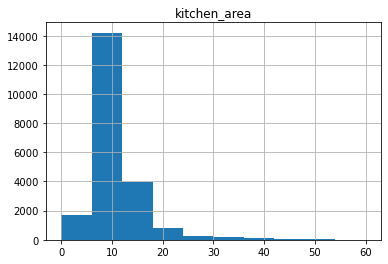

In [10]:
# посмотрим распределение kitchen_area до заполнения пропущенных значений
df.hist("kitchen_area", bins = 10, range = (0, 60))

Корреляция между площадью кухни и общей площадью равняется 0.61


<AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>

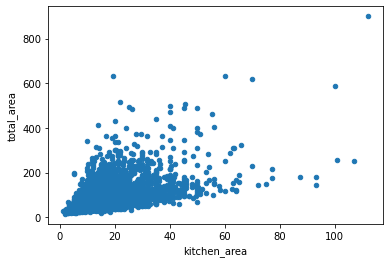

In [11]:
# на диаграмме рассеяния прослеживается определенная линейная зависимость между total_area и kitchen_area
print("Корреляция между площадью кухни и общей площадью равняется", 
      (df["kitchen_area"].corr(df["total_area"])).round(2))
df.plot(x = "kitchen_area", y = "total_area", kind = "scatter")

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

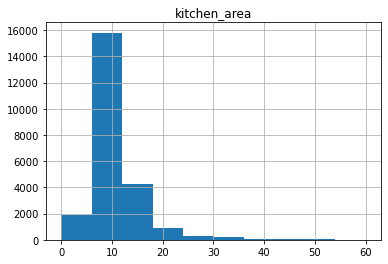

In [12]:
# применим группировку данных и заполним медианой пропуски
df["kitchen_area"] = df.groupby("total_area")["kitchen_area"].apply(lambda x: x.fillna(x.median()))
# распределение living_area после восстановления пропущенных значений
df.hist("kitchen_area", bins = 10, range = (0, 60))

Данный метод восстановаления пропущенных данных приводит к увеличению частоты распределения вокруг медианного значения, что в целом не должно привести к искажению результатов.

Столбцы `is_apartment` и `studio` должны быть взаимоисключащими, так как квартира не может являться одновременно и апартаментом, и студией. Однако на имеющихся данных мы видим, что есть сточки, где одинаковые значения в двух этих столбцах. Количество строк, где значения по столбцам `is_apartment` и `studio` проставлены `False`, равняется `2710`. Чтобы не усложнять заполнение пропущенных значений, проставим `False` в столбце `is_apartment` вместо пропущенных значений.

In [13]:
len(df[(df["is_apartment"] == True) & (df["studio"] == True)])

0

In [14]:
len(df[(df["is_apartment"] == False) & (df["studio"] == False)])

2710

In [15]:
df["is_apartment"] = df["is_apartment"].fillna(False)
df["is_apartment"].unique()

array([False,  True])

В столбце `balcony` также есть пропуски. Это означает, что при публикации объявления владелец квартиры не указал число балконов — скорее всего, их нет. Поэтому все пропущенные значения заменим на `0`.

In [16]:
df["balcony"] = df["balcony"].fillna(0)
df["balcony"].unique()

array([0., 2., 1., 5., 4., 3.])

Для заполнения пропущенных значений также создадим дополнительный столбец с категориальными значениями, рассчитанными на основе `last_price`.

In [17]:
# цены квартир разбиваются на квартили и на их основе строится категориальная переменная
df["housing_class"] = pd.qcut(df["last_price"], 4, ["эконом", "комфорт", "бизнес", "элитный класс"]) 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,housing_class
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,элитный класс
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,эконом
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,бизнес
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,95.0,9,False,False,False,15.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,элитный класс
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,элитный класс


In [18]:
# посмотрим нижний и верхний границы интервалов
price_intervals = df.groupby("housing_class").agg({"last_price" : ["min", "max"]})
price_intervals.columns = ["min_value", "max_value"]
price_intervals.style.format("{:,.2f}")

,min_value,max_value
housing_class,,
эконом,"12,190.00","3,400,000.00"
комфорт,"3,405,000.00","4,650,000.00"
бизнес,"4,650,259.00","6,800,000.00"
элитный класс,"6,812,033.00","763,000,000.00"


Для заполнения пропущенных значений по столбцу `floors_total` сгруппируем данные по `locality_name` и `housing_class`, так как дома одной ценовой категории на одной и той же территории должны иметь одинаковое количество этажей. 

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

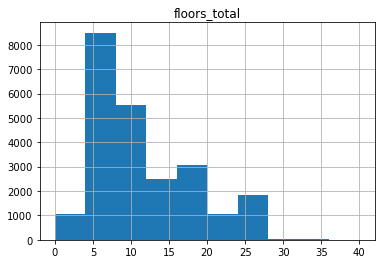

In [19]:
# посмотрим распределение floors_total до заполнения пропущенных значений
df.hist("floors_total", range = (0, 40))

In [20]:
df["floors_total"] = df.groupby(["locality_name", 
                                 "housing_class"])["floors_total"].apply(lambda x: x.fillna(x.median()))
df["floors_total"].isna().sum()

50

In [21]:
df[pd.isna(df["floors_total"])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,housing_class
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,NaN,50.80,2,False,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,элитный класс
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,NaN,42.60,2,False,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,бизнес
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,NaN,15.60,3,False,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,эконом
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,NaN,33.10,21,False,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,бизнес
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,NaN,30.80,5,False,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,комфорт
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,NaN,39.62,7,False,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,элитный класс
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,NaN,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,элитный класс
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,NaN,52.00,6,False,False,False,11.00,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,бизнес
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,NaN,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,элитный класс
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,NaN,20.00,23,False,False,False,6.00,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,комфорт


Из-за того, что в столбце `locality_name` есть пропущенные значения, которые никак не зполнить, то и в столбце `floors_total` эти же строчки остались незаполненными. Учитая размер датафрейма, от указанных строк можно избивать без вреда конечному результату.

In [22]:
df.dropna(subset = ["floors_total"], inplace = True)
df["floors_total"].isna().sum()

0

Однако после заполнения пропущенных значений в `floor`, некоторые значения в этом столбце превышают соответствующие значения в столбце `floors_total`.

In [23]:
print(len(df[df["floor"] > df["floors_total"]]))

31


Поэтому установим значения в `floor`, равные максимальное количеству этажей в этом доме.

In [24]:
df.loc[df["floor"] > df["floors_total"], "floor"] = df.loc[df["floor"] > df["floors_total"], "floors_total"]
print(df[df["floor"] > df["floors_total"]])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, housing_class]
Index: []


##### 2.2. Изменение типов данных

Поменяем тип данны в столбце `first_day_exposition` c `object` на `datetime`.

In [25]:
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"], format = "%Y-%m-%dT%H:%M:%S")
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,housing_class
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,элитный класс
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,эконом
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,бизнес
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,95.0,9,False,False,False,15.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,элитный класс
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,элитный класс


Также типы данных нужно поменять в столбцах `last_price`, `floors_total` и `balcony`.

In [26]:
df["last_price"] = df["last_price"].astype("int")
df["floors_total"] = df["floors_total"].astype("int")
df["balcony"] = df["balcony"].astype("int")

In [27]:
print(df[["last_price", "floors_total", "balcony"]].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23649 entries, 0 to 23698
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   last_price    23649 non-null  int64
 1   floors_total  23649 non-null  int64
 2   balcony       23649 non-null  int64
dtypes: int64(3)
memory usage: 739.0 KB
None


### Шаг 3. Расчеты

Рассчитаем цену квадратного метра и добавим в таблицу.

In [28]:
df["price_per_sqm"] = round(df["last_price"] / df["total_area"], 2)

Выведем день недели, месяц и год публикации объявления в отдельные столбцы.

In [29]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Добавим с таблицу столбец с типом этажа, на котором находится квартира.

In [30]:
df.loc[df["floor"] == df["floors_total"], "floor_type"] = "последний"
df.loc[df["floor"] == 1, "floor_type"] = "первый"
df.loc[(df["floor_type"] != "последний") & (df["floor_type"] != "первый"), "floor_type"] = "другой"

Рассчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [31]:
df["living_to_total_area"] = round(df["living_area"] / df["total_area"], 2)
df["kitchen_to_total_area"] = round(df["kitchen_area"] / df["total_area"], 2)

Проверим корректность проделанных расчетов.

In [32]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,housing_class,price_per_sqm,weekday,month_exposition,year_exposition,floor_type,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,элитный класс,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,эконом,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,бизнес,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,NaN,14,95.0,9,False,False,False,15.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,элитный класс,408176.10,4,7,2015,другой,0.60,0.09
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,элитный класс,100000.00,1,6,2018,другой,0.32,0.41


### Шаг 4. Исследовательский анализ данных 

##### 4.1. Площадь, цена, число комнат, высота потолков

Text(0.5, 1.0, 'Гистограмма площади квартир')

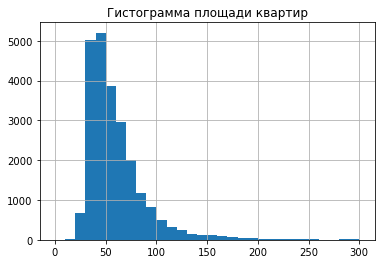

In [33]:
df.hist("total_area", range = (0, 300), bins = 30)
plt.title("Гистограмма площади квартир")

Text(0.5, 1.0, 'Гистограмма цены квартир')

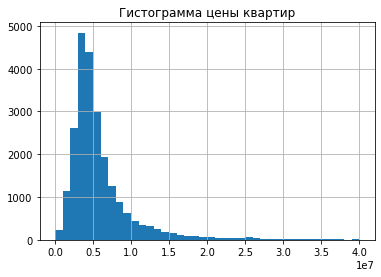

In [34]:
df.hist("last_price", bins = 40, range = (0, 40_000_000))
plt.title("Гистограмма цены квартир")

Text(0.5, 1.0, 'Гистограмма количества комнат в квартирах')

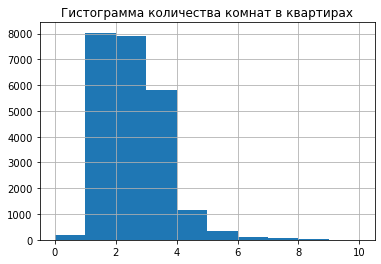

In [35]:
df.hist("rooms", range = (0, 10), bins = 10)
plt.title("Гистограмма количества комнат в квартирах")

Text(0.5, 1.0, 'Гистограмма высоты потолков в квартирах')

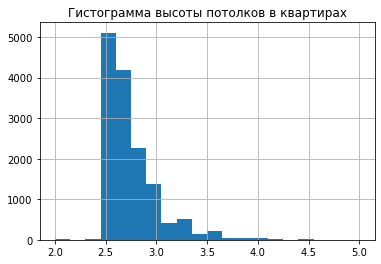

In [36]:
df.hist("ceiling_height", range = (2, 5), bins = 20)
plt.title("Гистограмма высоты потолков в квартирах")

### Выводы
---
Изучив графики мы можем сделать следующие выводы:

1. Чаще всего покупают квартиры площадью 30-60 кв. м., далее с увелечением площади количество продаж постепенно снижается. 

2. Типичная цена квартиры 2-7 млн. рублей, в остальном диапозоне количество продаж намного меньше. 

3. Подавляющее большинство квартир 1-3-х комнатные, при чем распределены в равных колличествах среди этих значений.

4. Площадь потолков обычно стремится к стандартным значениям: 2.5, 2.75, и 3 м. 

Таким образом, случайно взятая квартира вероятнее всего будет 45 кв. м, стоиость 4 млн. рублей, двухкомнатная, с высотой потолков 2.75.

##### 4.2. Время продажи квартиры

Text(0.5, 1.0, 'Гистограмма времени продажи квартиры на промежутке от 0 до 1400 дней')

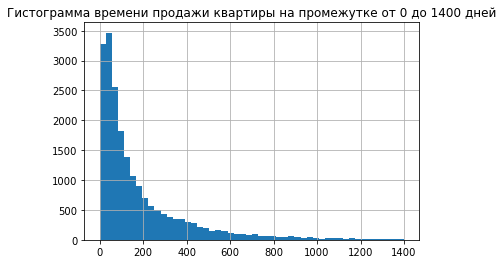

In [37]:
df.hist("days_exposition", bins = 50, range = (0, 1400))
plt.title("Гистограмма времени продажи квартиры на промежутке от 0 до 1400 дней")

Text(0.5, 1.0, 'Гистограмма времени продажи квартиры на промежутке от 0 до 100 дней')

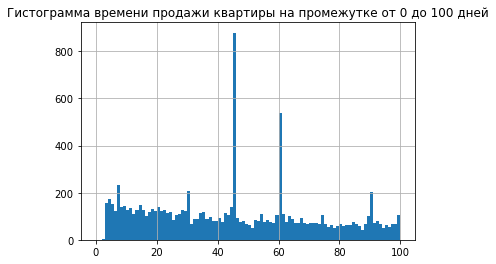

In [38]:
df['days_exposition'].hist(bins=100,range = (0, 100))
plt.title("Гистограмма времени продажи квартиры на промежутке от 0 до 100 дней")

In [39]:
print("Медиана: ", df["days_exposition"].median())
print("Среднее: ", round(df["days_exposition"].mean(), 1))

Медиана:  95.0
Среднее:  180.7


### Выводы
---
Изучив графики, можно сделать выводы, что в целом распределение времени продаж не вызывает вопросов, однако есть несколько моментов, на которые нужно обратить внимание:

1. Жильё, которое продавалась дольше 600 дней встречается редко, однако очень сильно влияет на среднее. Быстрые продажи (до 100 дней) распределены равномерно. 

2. Так же есть две аномалии в 45 и 60 дней, когда продается слишком много квартир, возможно это вызвано пропущенными/ошибочными данными, которые кто-то решил заменить на эти значения.

Чтобы оценить влияние аномальных значений в 45 и 60 дней, отбросим их и посчитаем среднее значение и медиану.

In [40]:
sample_exposition=df.query('days_exposition != 45 and days_exposition != 60 and days_exposition <600')
print("Медиана: ", round(sample_exposition["days_exposition"].median(), 1))
print("Среднее: ", round(sample_exposition["days_exposition"].mean(), 1))

Медиана:  90.0
Среднее:  141.1


В результате выброса аномальных данных изменилось не только среднее значение, но и медиана, несмотря на то, что медиана более устойчива к выбросам в данных по сравнению со средним значением.

##### 4.3. Стоимость квартиры

Для того, чтобы автоматизировать процесс оценки стоимости квартир необходимо найти значения от которых она зависит, а также определить насколько сильна эта связь. Для этого возьмем различные параметры, которые могут потенциально влиять на цену, найдем коэффициент корреляции и построим диграммы рассеяния.

Корреляция между last_price и total_area:  0.65
Корреляция между last_price и rooms:  0.36
Корреляция между last_price и cityCenters_nearest:  -0.21
Корреляция между last_price и floor:  0.03
Корреляция между last_price и weekday:  0.0
Корреляция между last_price и month_exposition:  0.0
Корреляция между last_price и year_exposition:  -0.04


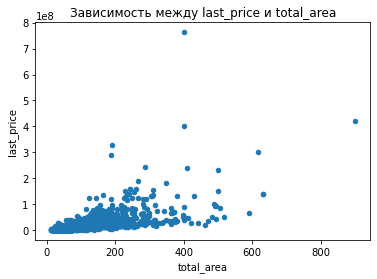

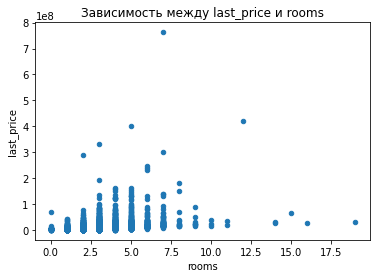

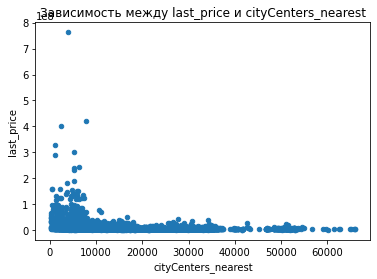

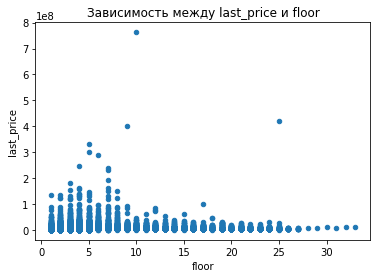

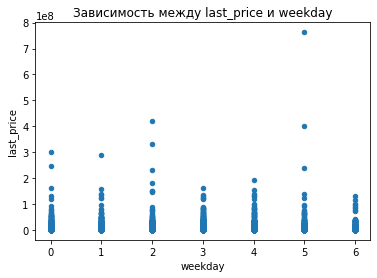

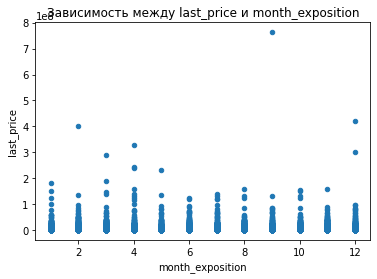

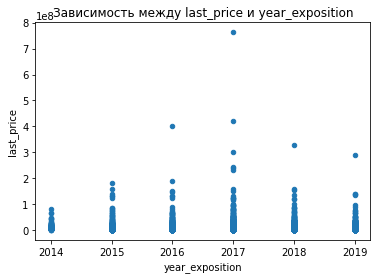

In [41]:
for criteria in ['total_area','rooms','cityCenters_nearest',
                 'floor','weekday','month_exposition','year_exposition']:
    df.plot(x = criteria, y = "last_price", kind = "scatter")
    plt.title("Зависимость между {} и {}".format("last_price", criteria))
    print("Корреляция между {} и {}: ".format("last_price", criteria), 
          df["last_price"].corr(df[criteria]).round(2))

### Выводы:
---
1. Есть сильная положительная корреляция между площадью и ценой квартиры. Этого стоило ожидать, потому что больше площадь квартиры, тем выше ее стоимость.

2. Количество комнат имеет линейную связь со стоимостью квартиры, но эта связь практически в два раза ниже, чем у площади квартиры.

3. Еще более низкая связь прослеживается между расстоянием от центра города и ценой квартиры. Ожидалось, что данная связь будет значительной. Отрицательную корреляцию можно объяснить тем, что чем дальше от центра города находится квартира, тем ниже ее стоимость.

4. Судя по коэффициенту корреляции стоимость жилья не зависит от года, месяца и дня недели, когда оно было продано. Однако мы можем заметить, что в 2014 году цены были заметно меньше, чем в остальных годах. Это может быть связано с непопулярностью сервиса в то время и маленькой выборкой, а также с экономическими причинами (например, более высокая покупательная способность национальной валюты по сравнению с последующими годами).

##### 4.4. 10 населённых пунктов с наибольшим числом объявлений

In [42]:
top = df["locality_name"].value_counts().sort_values(ascending = False).head(10)
print(top)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


In [43]:
df_top = df[df["locality_name"].isin(top.index.values)]
top_pivot_table = df_top.pivot_table(index = "locality_name", 
               values = "price_per_sqm", aggfunc = ["mean", "median"])
top_pivot_table.columns = ["mean", "median"]
top_pivot_table = top_pivot_table.loc[top.index]
top_pivot_table.style.format("{:,.2f}")

,mean,median
Санкт-Петербург,"114,849.01","104,761.90"
посёлок Мурино,"85,752.19","85,878.46"
посёлок Шушары,"78,677.36","76,876.18"
Всеволожск,"68,654.47","65,789.47"
Пушкин,"103,125.82","100,000.00"
Колпино,"75,424.58","74,723.74"
посёлок Парголово,"90,175.91","91,642.86"
Гатчина,"68,746.15","67,796.61"
деревня Кудрово,"92,473.55","91,860.47"
Выборг,"58,141.91","58,158.32"


Text(0.5, 1.0, 'Среднняя цена кв. м. в топ 10 населенных пунктах')

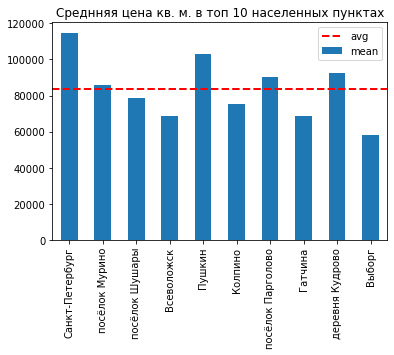

In [44]:
top_pivot_table.plot(y = "mean", kind = "bar")
plt.axhline(y = top_pivot_table["mean"].mean(), color='red', linestyle='--', linewidth = 2, label='avg')
plt.legend(loc = 0)
plt.title("Среднняя цена кв. м. в топ 10 населенных пунктах")

### Выводы
---
Наибольшиее число объявлений было опубликовано в г. Санкт-Петербург (около 16 тыс.). Остальные населенные пункты показывают гораздно скромные результаты в данном показателе (в среднем 360 объявления). Средняя цена кв. м. ожидаемо является самой высокой в г. Санкт-Петербург. В следующих после г. Санкт-Петербург 3 населенных пункта по количеству объявлений средняя цена кв. м. практические не превышает среднее значение цены кв. м. среди 10 наиболее популярных населенных пункта.  

##### 4.5. Анализ центральной области

In [45]:
df_spb = df[df["locality_name"] == "Санкт-Петербург"]
print("Средние характеристики квартир в Санкт-Петербурге:")
print("Площадь:", df_spb['total_area'].median())
print("Цена:", df_spb['last_price'].median())
print("Количество комнат:", df_spb['rooms'].median())
print("Высота потолка:", df_spb['ceiling_height'].median())

Средние характеристики квартир в Санкт-Петербурге:
Площадь: 55.0
Цена: 5500000.0
Количество комнат: 2.0
Высота потолка: 2.7


In [46]:
# отделим квартиры, которые находится близко к центру города
df_spb_center = df[(df["locality_name"] == "Санкт-Петербург") & (df["cityCenters_nearest"] < 8000)]
print("Средние характеристики квартир в центральных районах Санкт-Петербурга:")
print("Площадь:", df_spb_center['total_area'].median())
print("Цена:", df_spb_center['last_price'].median())
print("Количество комнат:", df_spb_center['rooms'].median())
print("Высота потолка:", df_spb_center['ceiling_height'].median())

Средние характеристики квартир в центральных районах Санкт-Петербурга:
Площадь: 77.76
Цена: 9000000.0
Количество комнат: 3.0
Высота потолка: 3.0


Средняя квартира в центральных районах города Санкт-Петербург имеет характеристики получше, чем средняя квартира по городу. Однако стоимость на порядок выше. Посмотрим взаимосвязи между раными характеристиками квартиры в целом по городу Санкт-Петербург и отдельно в центральных районах.

In [47]:
df_spb[["last_price", "rooms", "floor", "cityCenters_nearest", "year_exposition"]].corr().round(2)

,last_price,rooms,floor,cityCenters_nearest,year_exposition
last_price,1.00,0.37,-0.00,-0.26,-0.04
rooms,0.37,1.00,-0.16,-0.29,-0.06
floor,-0.00,-0.16,1.00,0.23,0.01
cityCenters_nearest,-0.26,-0.29,0.23,1.00,0.09
year_exposition,-0.04,-0.06,0.01,0.09,1.00


In [48]:
df_spb_center[["last_price", "rooms", "floor", "cityCenters_nearest", "year_exposition"]].corr().round(2)

,last_price,rooms,floor,cityCenters_nearest,year_exposition
last_price,1.00,0.33,0.13,-0.05,-0.04
rooms,0.33,1.00,-0.04,-0.18,-0.06
floor,0.13,-0.04,1.00,0.25,-0.03
cityCenters_nearest,-0.05,-0.18,0.25,1.00,0.03
year_exposition,-0.04,-0.06,-0.03,0.03,1.00


Таким образом, для покупателей в центре при выборе квартиры немного менее важно число комнат и удаленность от центра (т.к. квартира и так в центре), однако более важно количество этажей в доме.

### Шаг 5. Общий вывод
---
Проанализировов рынок недвижимости с разных точек зрения, формулировать выводы следует в соответствии с этими разрезами, которые были сделаны в процессе анализе. 

1. Во-первых, сформулируем выводы по всему набору данных. Ключевые характеристики срднестатистической квартиры из набора данных следующие:

    - Чаще всего покупают квартиры площадью 30-60 кв. м., далее с увелечением площади количество продаж постепенно снижается. 

    - Типичная цена квартиры 2-7 млн. рублей, в остальном диапозоне количество продаж намного меньше. 

    - Подавляющее большинство квартир 1-3-х комнатные, при чем распределены в равных колличествах среди этих значений.

    - Площадь потолков обычно стремится к стандартным значениям: 2.5, 2.75, и 3 м. 
 
2. Во-вторых, мы рассмотрели объявления в г. Санкт-Петербург, потому что в данном городе наибольшее количество объявлений (порядка 16 тыс.). Площадь квартиры очень сильно влияет на её стоимость, это один из ключевых факторов. Следующий фактор, на который стоит обратить внимание, - это количество комнат. Дальность от центра города также имеет некоторую взаимосвязь с ценой квартиры. И, наконец, цены квартиры не зависит от дня недели, месяца и года размещения объявления.

3. В-третьих, отдельно были изучены объявления из центральных районов г. Санкт-Петербург. Здесь факторы, определяющие цену квартиры, имеют немного другую структуру. Аналогичному тому, что свойствено для всего города, цена квартиру в центральных районах Санкт-Петербурга зависит от количества комнат. Вторым по важности фактором является количество этажей в доме, а близость к центру города уже не важна, так как квартира так и так близко к центру города находится. В данной категории квартир также не важно, в какое время было опубликовано объявление.